# House prices analysis..

## First some clean up of data...


In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import dateutil

%matplotlib inline
matplotlib.style.use('ggplot')

data = pd.read_csv(r'data.csv', parse_dates=['date'], index_col='date')
# remove currency sign and spaces from data
data['pricePerSquareMeter'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['numberOfRooms'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['size'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
data['floor'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

data['price'] = data['price'].astype(float)
data['pricePerSquareMeter'] = data['pricePerSquareMeter'].astype(float)
data['numberOfRooms'] = data['numberOfRooms'].astype(int)
data['size'] = data['size'].astype(int)
data['floor'] = data['floor'].astype(int)


## All sizes


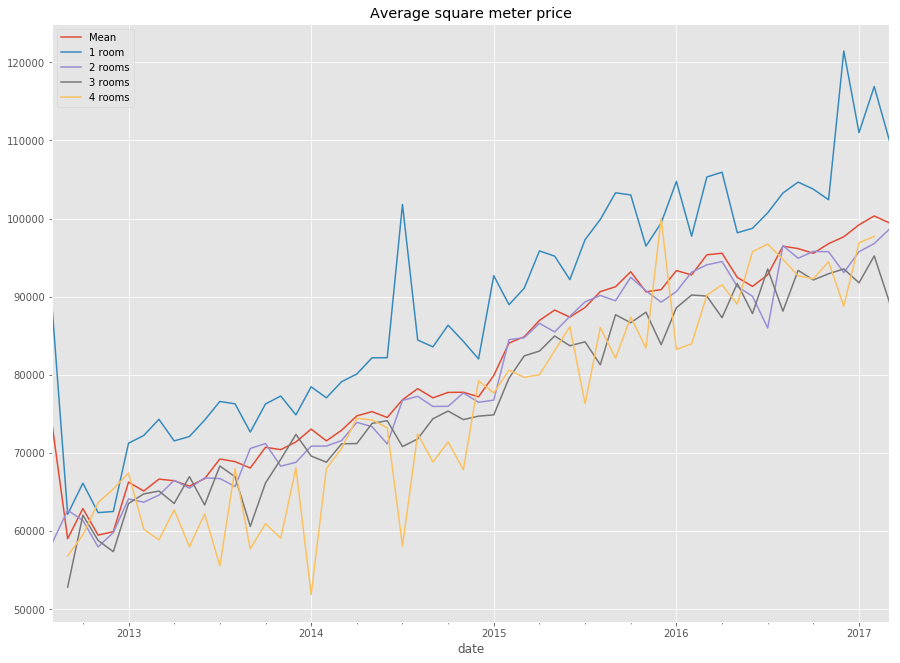

In [2]:
#data.groupby(data.index)['pricePerSquareMeter'].mean().plot(title="Average square meter price", figsize=(12, 9))

plt = data.groupby((pd.TimeGrouper(freq='M')))['pricePerSquareMeter'].mean().plot(title="Average square meter price", figsize=(15, 11))

for i in range(1,5):
    numberOfRooms = i
    filteredData = data[data['numberOfRooms'] == numberOfRooms]
    filteredData.groupby((pd.TimeGrouper(freq='M')))['pricePerSquareMeter'].mean().plot()


plt.get_legend_handles_labels()

plt.legend(['Mean', '1 room', '2 rooms', '3 rooms', '4 rooms'])


## X number of rooms

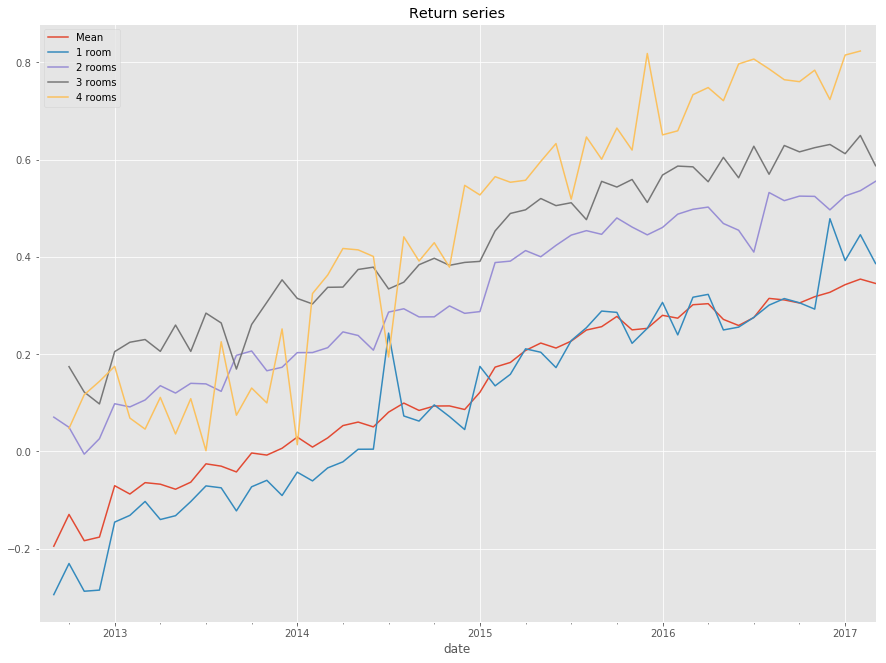

In [3]:
plt = data.groupby((pd.TimeGrouper(freq='M')))['pricePerSquareMeter'].mean().pct_change().cumsum().plot(title="Return series", figsize=(15, 11))

for i in range(1,5):
    numberOfRooms = i
    filteredData = data[data['numberOfRooms'] == numberOfRooms]
    filteredData.groupby((pd.TimeGrouper(freq='M')))['pricePerSquareMeter'].mean().pct_change().cumsum().plot()


plt.get_legend_handles_labels()

plt.legend(['Mean', '1 room', '2 rooms', '3 rooms', '4 rooms'])